<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/2_Tensorflow_%EC%88%98%EC%97%85%EC%9A%A9(0811).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow
### Tensorflow란?
- 구글에서 만든 오픈소스 라이브러리
- 텐서 연산을 지원
- 2.x 버전으로 오면서 문법이 쉬워짐

### 텐서란?
- dtype을 가진 다차원 배열 
- 일종의 ``np.arrays``와 같다

### 용어
- type : ``int8``, ``int16``, ``float32``, ``string`` 등
- 형상(shape): 텐서의 각 차원의 길이(요소의 수)  (3, 2, 4, 5)
- 순위(rank): 텐서 차원의 수입니다. 스칼라는 순위가 0이고 벡터의 순위는 1이며 행렬의 순위는 2입니다.
- 축 또는 차원(axis): 텐서의 특정 차원
- 크기(size): 텐서의 총 항목 수, 곱 형상 벡터

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.5.0


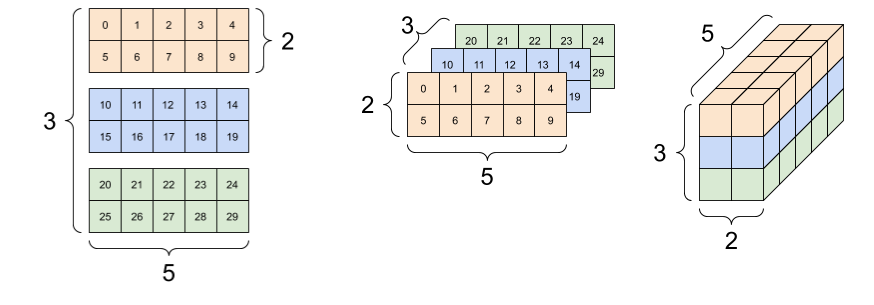

### 텐서 만들어보기

In [ ]:
# 0차원의 텐서
rank_0_tensor = tf.constant(3)
print(rank_0_tensor)
print(tf.rank(rank_0_tensor))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [ ]:
# 1차원의 텐서
rank_1_tensor = tf.constant([1, 2])
print('Rank = ', tf.rank(rank_1_tensor))
print(rank_1_tensor)

Rank =  tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


In [ ]:
# 2차원 텐서
rank_2_tensor = tf.constant([[1, 2], [3, 4]])
print('Rank = ', tf.rank(rank_2_tensor))
print(rank_2_tensor)

Rank =  tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
# 3차원 텐서
rank_3_tensor = tf.constant([
                             [
                              [1,2]
                              ],
                             [
                              [1,2]
                              ],
                             [
                              [1,2]
                              ]
                             ])
print('Rank : ', tf.rank(rank_3_tensor))
print(rank_3_tensor)

Rank :  tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(
[[[1 2]]

 [[1 2]]

 [[1 2]]], shape=(3, 1, 2), dtype=int32)


In [ ]:
# rank4 
rank_4_tensor = tf.random.uniform((3, 3, 3, 3))
print('Rank = ', tf.rank(rank_4_tensor))

Rank =  tf.Tensor(4, shape=(), dtype=int32)


### 난수 생성

In [ ]:
# 첫번째는 shape 나머지는 optional
random_a = tf.random.uniform((2, 2), 0, 1)
print(random_a.shape)
print(random_a)

(2, 2)
tf.Tensor(
[[0.31745863 0.41132712]
 [0.53111124 0.58653843]], shape=(2, 2), dtype=float32)


In [ ]:
random_b = tf.random.normal((2, 2, 2), 0, 1)
print(random_b.shape)
print(random_b)

(2, 2, 2)
tf.Tensor(
[[[-0.22229424  0.9253354 ]
  [-1.2937872   0.3939714 ]]

 [[ 2.3786864   0.16546953]
  [ 0.37342772 -1.899858  ]]], shape=(2, 2, 2), dtype=float32)


In [ ]:
tf.random.set_seed(42)
random_c = tf.random.normal((2, 2), 3, 1,)
random_d = tf.random.normal((2, 2), 3, 1,)
random_f = tf.random.normal((2, 2), 3, 1,)

print(random_c)
print(random_d)
print(random_f)

tf.Tensor(
[[3.3274684 2.1573741]
 [3.3194337 1.5924481]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[3.0842247 2.1390963]
 [3.378123  2.9948037]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2.4409027 2.4652786]
 [5.3730335 1.4274069]], shape=(2, 2), dtype=float32)


1. Global seed nor Operation Seed = 항상 랜덤
2. Global seed, not Operation Seed = 글로벌 시드에 따라 결과를 받는다
3. not Global seed, Operaion Seed = 항상 랜덤
4. Global seed and Operaion Seed = 두 시드 모두 적용 -> 매번 동일 결과

### 넘파이 변환

In [ ]:
# 넘파이로 변환
a = tf.random.uniform((2,2))
b = tf.random.uniform((2,2))
print(type(a), type(b))
print(type(a.numpy()), type(b.numpy()))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
import numpy as np

In [ ]:
a = np.array([1, 2, 3])
print(type(a))
print(tf.convert_to_tensor(a), '\n', type(tf.convert_to_tensor(a)))

<class 'numpy.ndarray'>
tf.Tensor([1 2 3], shape=(3,), dtype=int64) 
 <class 'tensorflow.python.framework.ops.EagerTensor'>


### 인덱싱

In [ ]:
a = tf.constant([1, 2, 3, 4, 5 , 6, 7])
print(a)

tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


In [ ]:
a[3]

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [ ]:
# numpy로 변환 후 인덱싱 하기
print(a.numpy()[0])
print(a[0].numpy())
print(a[:1].numpy())

1
1
[1]


In [ ]:
print(a[:1].numpy())
print(a.numpy()[:1])
print(a[:].numpy())
print(a.numpy()[:])

[1]
[1]
[1 2 3 4 5 6 7]
[1 2 3 4 5 6 7]


In [ ]:
b = tf.constant([[1,2], [3,4], [5,6]])
print(b)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [ ]:
b[0, 1]

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [ ]:
b[0, :]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
b[:, :]

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
b[...]

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
c = tf.random.uniform((3,3,3,3,3,3,3,3))

In [ ]:
# c[0, ...]

### DTYPES
- 같은 타입의 텐서끼리만 연산 가능

In [ ]:
a = np.array([1, 2, 3], dtype='int')
b = np.array([1, 2, 3], dtype='float')

a + b

array([2., 4., 6.])

In [ ]:
a = tf.constant(3)
b = tf.constant(3.)
print(a.dtype, b.dtype)

<dtype: 'int32'> <dtype: 'float32'>


In [ ]:
a + b

InvalidArgumentError: ignored

In [ ]:
a = tf.constant(3, dtype='int32')
b = tf.constant(3, dtype='int8')
print(a.dtype, b.dtype)
print(a + b)

<dtype: 'int32'> <dtype: 'int8'>


InvalidArgumentError: ignored

In [ ]:
# cast
a = tf.constant(3)
b = tf.constant(3.)
b = tf.cast(b, tf.int32)
print(a + b)

tf.Tensor(6, shape=(), dtype=int32)


### reshape

In [ ]:
a = tf.constant([[1, 2, 3], [4, 5, 6]])
print(a, a.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32) (2, 3)


In [ ]:
tf.reshape(a, [3, 2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
long_tensor = tf.random.uniform((3, 2, 3))
print(long_tensor)

tf.Tensor(
[[[0.95831835 0.01680839 0.3156035 ]
  [0.16013157 0.7148702  0.7892921 ]]

 [[0.11484027 0.33310425 0.21091413]
  [0.62329304 0.9865029  0.12230623]]

 [[0.20660043 0.87113273 0.0206511 ]
  [0.21824265 0.6902214  0.70987105]]], shape=(3, 2, 3), dtype=float32)


In [ ]:
tf.reshape(long_tensor, [-1])

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([0.95831835, 0.01680839, 0.3156035 , 0.16013157, 0.7148702 ,
       0.7892921 , 0.11484027, 0.33310425, 0.21091413, 0.62329304,
       0.9865029 , 0.12230623, 0.20660043, 0.87113273, 0.0206511 ,
       0.21824265, 0.6902214 , 0.70987105], dtype=float32)>

### 비정형 텐서

In [ ]:
ragged_list = [
               [0, 1, 2, 3],
               [4, 5],
               [6, 7, 8],
               [9]
]

In [ ]:
ragged_list

[[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]

In [ ]:
tensor = tf.constant(ragged_list)

ValueError: ignored

In [ ]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [ ]:
print(ragged_tensor.shape)

(4, None)


### 문자열 텐서

In [ ]:
string_tensor = tf.constant('Hello World')
print(string_tensor)

tf.Tensor(b'Hello World', shape=(), dtype=string)


In [ ]:
string_tensor_1d = tf.constant(['Hello World', 
                                'string tensor', 
                                'with different',
                                'length'
                                ])
print(string_tensor_1d)

tf.Tensor([b'Hello World' b'string tensor' b'with different' b'length'], shape=(4,), dtype=string)


In [ ]:
string_tensor_1d[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [ ]:
string_tensor_1d[:1]

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Hello World'], dtype=object)>

In [ ]:
string_tensor_1d[1:3]

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'string tensor', b'with different'], dtype=object)>

In [ ]:
tf.strings.split(string_tensor_1d, sep=' ')[0][1]

<tf.Tensor: shape=(), dtype=string, numpy=b'World'>

### 변수

- 공유 영구 상태를 나타내는 방법
- 변수를 작성하기 위해서는 초기값을 제공해야 함
- 딥러닝 모델 학습 시 , 그래프 연산이 필요할 때 사용

In [ ]:
my_tensor = tf.constant([1, 2])
my_variable = tf.Variable(my_tensor)
my_variable

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

### 오토그래프
- graph 모드가 eager 모드보다 더 빠르다

### @tf.function
- 자동으로 그래프를 생성
- 그래프로 변환하여 사용 -> gpu 연산 가능
- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용 가능
- 원본 함수가 필요하다면 (tf.function).python_function()

In [ ]:
@tf.function
def my_func(x) : 
    return x**2 +5*x - 7

print(my_func(2))
print(my_func(tf.constant(3)))

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)


In [ ]:
def origin_my_func(x) : 
    return x**2 +5*x - 7

print(origin_my_func(3))

# 텐서 함수는 텐서 객체로 결과가 나오지만, 일반 함수는 일반값 리턴

17


In [ ]:
my_func.python_function(2)

7

In [ ]:
def get_faster_func(x, y, b) : 
    x = tf.matmul(x, y)
    y += b
    return x

a_function_using_graph = tf.function(get_faster_func)

x1 = tf.constant([[1., 2.]])
y1 = tf.constant([[2.], [3.]])
b1 = tf.constant(4.)

a_function_using_graph(x1, y1, b1)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[8.]], dtype=float32)>

In [ ]:
import timeit

In [ ]:
import timeit
import tensorflow as tf
class SequentialModel(tf.keras.Model):
  def __init__(self, **kwargs) : 
    super(SequentialModel, self).__init__(**kwargs)
    self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
    self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout = tf.keras.layers.Dropout(0.2)
    self.dense_2 = tf.keras.layers.Dense(10)

  def call(self, x) : 
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.dropout(x)
    x = self.dense_2(x)
    return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print('eager model', timeit.timeit(lambda : eager_model(input_data), number=10000))
print('graph model', timeit.timeit(lambda : graph_model(input_data), number=10000))

eager model 11.155609345999977
graph model 4.384821192000004


### 뉴런
- 입력 -> 연산 -> 활성화 함수 -> 출력

In [ ]:
import numpy as np

def relu(x) : 
    return (np.maximum(x, 0))

def neuron(x, W, bias=0) : 
    z = x * W + bias
    return relu(z)

In [ ]:
x = tf.random.normal((1,))
W = tf.random.normal((2,1))

print('x.shape', x.shape)
print('W.shape', W.shape)

x.shape (1,)
W.shape (2, 1)


In [ ]:
print(neuron(x, W))

[[0.14038672]
 [0.19033277]]


퍼셉트론
- 가중치 업데이트 식

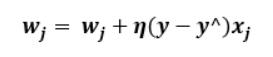

- w_j : 가중치
- y : 정답 레이블
- y^ : 예측 레이블
- n : 학습률

In [ ]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(neuron(x, W))
print('y : ', y)

[0.6490803]
y :  0


In [ ]:
def sigmoid(x) : 
    return (1 / (1 + np.exp(-x)))

In [ ]:
def neuron2(x, W, bias=0) : 
    z = x * W + bias
    return sigmoid(z)

In [ ]:
W = tf.random.normal([1], 0, 1)
x = 1
y = 0
for i in range(1000) : 
    learning_rate = 0.1
    output = neuron2(x, W)

    W =  W + learning_rate * (y - output) * x
    
    if i % 100 == 99 : 
        print(f'{i + 1} \t ERROR {y-output} \t OUTPUT {output}')

100 	 ERROR [-0.13102376] 	 OUTPUT [0.13102376]
200 	 ERROR [-0.05951148] 	 OUTPUT [0.05951148]
300 	 ERROR [-0.03794587] 	 OUTPUT [0.03794587]
400 	 ERROR [-0.02774289] 	 OUTPUT [0.02774289]
500 	 ERROR [-0.02182859] 	 OUTPUT [0.02182859]
600 	 ERROR [-0.01797811] 	 OUTPUT [0.01797811]
700 	 ERROR [-0.01527519] 	 OUTPUT [0.01527519]
800 	 ERROR [-0.01327487] 	 OUTPUT [0.01327487]
900 	 ERROR [-0.01173547] 	 OUTPUT [0.01173547]
1000 	 ERROR [-0.01051457] 	 OUTPUT [0.01051457]


In [ ]:
W = tf.random.normal([1], 0, 1)
x = 3
y = 1
for i in range(1000) : 
    learning_rate = 0.1
    output = neuron2(x, W)

    W =  W + learning_rate * (y - output) * x
    
    if i % 100 == 99 : 
        print(f'{i + 1} \t ERROR {y-output} \t OUTPUT {output}')

100 	 ERROR [0.01123452] 	 OUTPUT [0.9887655]
200 	 ERROR [0.00559837] 	 OUTPUT [0.99440163]
300 	 ERROR [0.00372577] 	 OUTPUT [0.99627423]
400 	 ERROR [0.00279146] 	 OUTPUT [0.99720854]
500 	 ERROR [0.0022316] 	 OUTPUT [0.9977684]
600 	 ERROR [0.00185871] 	 OUTPUT [0.9981413]
700 	 ERROR [0.00159246] 	 OUTPUT [0.99840754]
800 	 ERROR [0.00139302] 	 OUTPUT [0.998607]
900 	 ERROR [0.00123799] 	 OUTPUT [0.998762]
1000 	 ERROR [0.00111395] 	 OUTPUT [0.99888605]


### AND GATE

In [ ]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2])
b = tf.random.normal([1])
b_x = 1

for i in range(2000) : 
    error_sum = 0

    for j in range(4) : 
        output = sigmoid(np.sum(X[j] + W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 : 
        print(f'Epoch {i} \t ERROR {error_sum}')

print(f'Weight {W}')
print(f'Bias {b}')

Epoch 0 	 ERROR [-2.1200128]
Epoch 200 	 ERROR [-0.30153853]
Epoch 400 	 ERROR [-0.3015423]
Epoch 600 	 ERROR [-0.30153722]
Epoch 800 	 ERROR [-0.30153817]
Epoch 1000 	 ERROR [-0.30153817]
Epoch 1200 	 ERROR [-0.30153185]
Epoch 1400 	 ERROR [-0.301535]
Epoch 1600 	 ERROR [-0.301535]
Epoch 1800 	 ERROR [-0.301535]
Weight [26.98027  29.554298]
Bias [-59.407764]


In [ ]:
for i in range(4) : 
    print(f'X: {X[i]} Y: {Y[i]} Output:{sigmoid(np.sum(X[i] * W) + b)}')

X: [1 1] Y: [1] Output:[0.05349462]
X: [1 0] Y: [0] Output:[8.258825e-15]
X: [0 1] Y: [0] Output:[1.083439e-13]
X: [0 0] Y: [0] Output:[1.5831998e-26]


### OR Gate

In [ ]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [1], [1], [0]])

W = tf.random.normal([2])
b = tf.random.normal([1])
b_x = 1

for i in range(2000) : 
    error_sum = 0

    for j in range(4) : 
        output = sigmoid(np.sum(X[j] + W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 : 
        print(f'Epoch {i} \t ERROR {error_sum}')

print(f'Weight {W}')
print(f'Bias {b}')

Epoch 0 	 ERROR [-0.89777434]
Epoch 200 	 ERROR [-0.38294667]
Epoch 400 	 ERROR [-0.3829437]
Epoch 600 	 ERROR [-0.38293606]
Epoch 800 	 ERROR [-0.38293606]
Epoch 1000 	 ERROR [-0.38294512]
Epoch 1200 	 ERROR [-0.38294512]
Epoch 1400 	 ERROR [-0.38294512]
Epoch 1600 	 ERROR [-0.38294512]
Epoch 1800 	 ERROR [-0.38296753]
Weight [38.155785 37.591774]
Bias [-75.92398]


In [ ]:
for i in range(4) : 
    print(f'X: {X[i]} Y: {Y[i]} Output:{sigmoid(np.sum(X[i] * W) + b)}')

X: [1 1] Y: [1] Output:[0.4560085]
X: [1 0] Y: [1] Output:[3.9580463e-17]
X: [0 1] Y: [1] Output:[2.2518224e-17]
X: [0 0] Y: [0] Output:[1.06324695e-33]


### XOR Gate

In [ ]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [1]])

W = tf.random.normal([2])
b = tf.random.normal([1])
b_x = 1

for i in range(2000) : 
    error_sum = 0

    for j in range(4) : 
        output = sigmoid(np.sum(X[j] + W) + b_x + b)
        error = Y[j][0] - output
        W = W + X[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error

    if i % 200 == 0 : 
        print(f'Epoch {i} \t ERROR {error_sum}')

print(f'Weight {W}')
print(f'Bias {b}')

Epoch 0 	 ERROR [-1.9009888]
Epoch 200 	 ERROR [0.23421061]
Epoch 400 	 ERROR [0.2342081]
Epoch 600 	 ERROR [0.23420715]
Epoch 800 	 ERROR [0.23420823]
Epoch 1000 	 ERROR [0.23420823]
Epoch 1200 	 ERROR [0.23420823]
Epoch 1400 	 ERROR [0.2342124]
Epoch 1600 	 ERROR [0.23420614]
Epoch 1800 	 ERROR [0.23420614]
Weight [-26.014473 -22.159012]
Bias [45.89583]


In [ ]:
for i in range(4) : 
    print(f'X: {X[i]} Y: {Y[i]} Output:{sigmoid(np.sum(X[i] * W) + b)}')

X: [1 1] Y: [1] Output:[0.09299041]
X: [1 0] Y: [0] Output:[1.]
X: [0 1] Y: [0] Output:[1.]
X: [0 0] Y: [1] Output:[1.]


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.random.seed(42)

X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [1]])

model = Sequential([
                    Dense(2, input_shape=(2,)),
                    Activation('sigmoid'),
                    Dense(1, input_shape=(2,)),
                    Activation('sigmoid')
])

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X, y=Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 367ms/step - loss: 0.2612
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2611
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2610
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2608
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2607
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2606
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.2604
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2603
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2602
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2601


In [ ]:
model.predict(X)

array([[0.55954444],
       [0.57892996],
       [0.6189789 ],
       [0.6430666 ]], dtype=float32)

### loss 시각화

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 15s 184ms/step - loss: 1.3008 - accuracy: 0.3667 - val_loss: 0.9419 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9437 - accuracy: 0.6290 - val_loss: 0.8386 - val_accuracy: 0.8000
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8285 - accuracy: 0.8488 - val_loss: 0.8033 - val_accuracy: 0.8667
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.7877 - accuracy: 0.8835 - val_loss: 0.7369 - val_accuracy: 0.8667
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7181 - accuracy: 0.8340 - val_loss: 0.6678 - val_accuracy: 0.7667
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6606 - accuracy: 0.7942 - val_loss: 0.6250 - val_accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.6310 - accuracy: 0.8369 - val_loss: 0.5880 - val_accuracy: 0.8667
Epoch 8/100
4/4 [=====

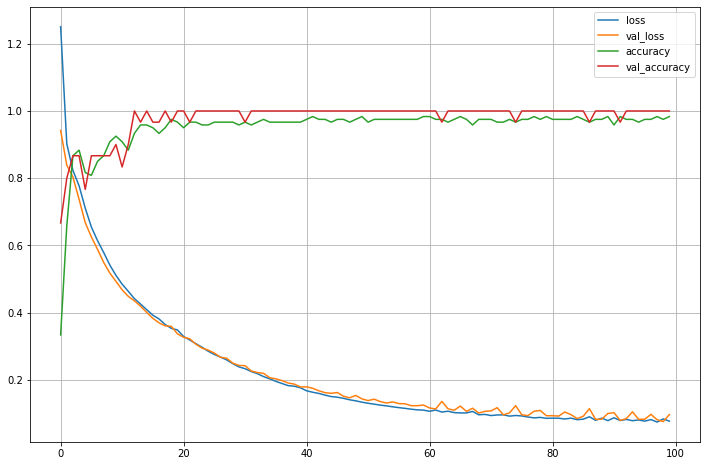

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8 ))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()